In [1]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [3]:
from sklearn.svm import LinearSVC
model = BernoulliRBM()
clf = LinearSVC()
rbm_svm_classifier = Pipeline(
    steps=[('model', model), ('clf', clf)])

In [4]:
model.n_components = 500

In [5]:
rbm_svm_classifier.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('model', BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=500, n_iter=10,
       random_state=None, verbose=0)), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [6]:
y_pred = rbm_svm_classifier.predict(X_test)

In [7]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.96      0.97      1032
          3       0.94      0.96      0.95      1010
          4       0.97      0.96      0.97       982
          5       0.96      0.95      0.96       892
          6       0.98      0.98      0.98       958
          7       0.98      0.96      0.97      1028
          8       0.93      0.96      0.95       974
          9       0.94      0.94      0.94      1009

avg / total       0.97      0.96      0.96     10000



In [8]:
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [9]:
y_pred1 = clf.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred1))

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.96      0.98      0.97      1135
          2       0.93      0.88      0.91      1032
          3       0.90      0.91      0.90      1010
          4       0.92      0.93      0.92       982
          5       0.89      0.86      0.88       892
          6       0.94      0.95      0.94       958
          7       0.92      0.92      0.92      1028
          8       0.87      0.87      0.87       974
          9       0.90      0.89      0.89      1009

avg / total       0.92      0.92      0.92     10000



In [11]:
W = model.components_
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

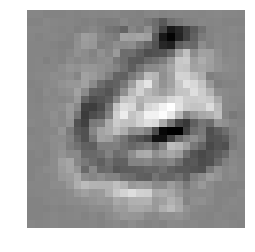

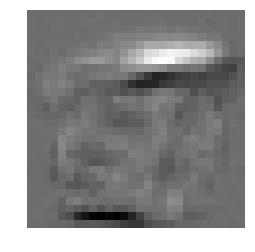

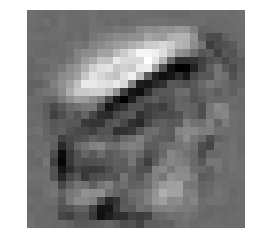

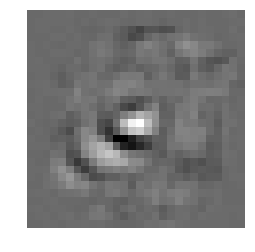

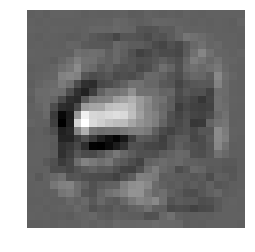

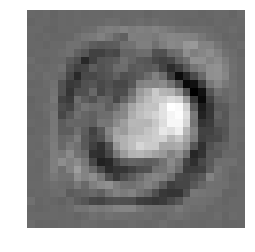

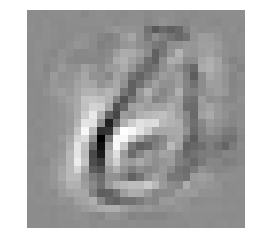

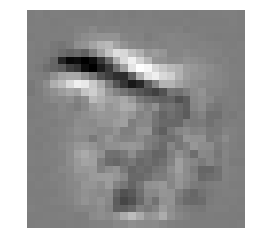

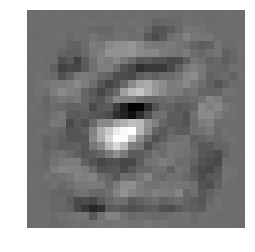

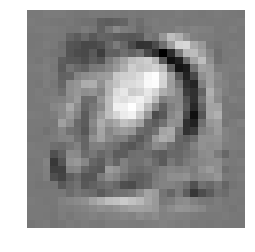

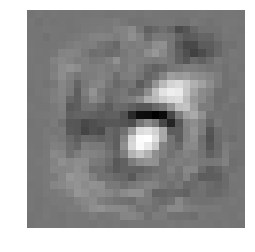

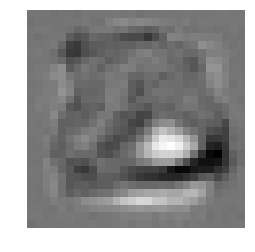

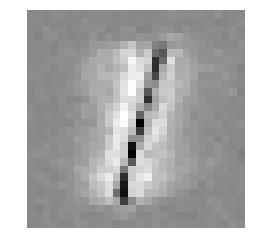

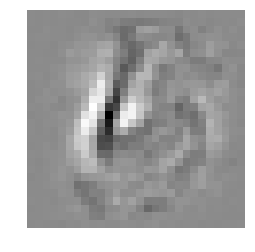

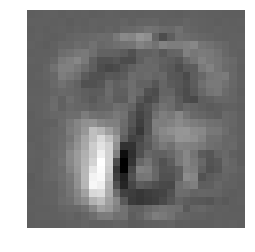

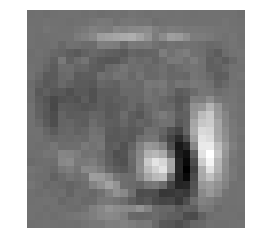

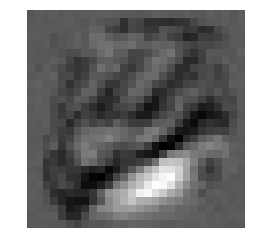

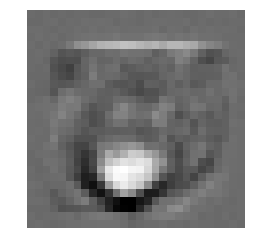

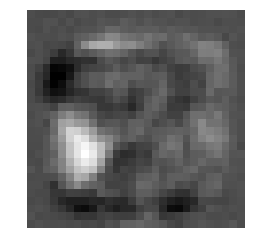

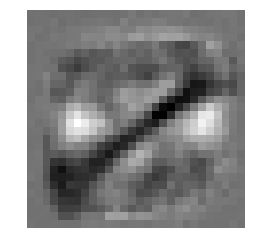

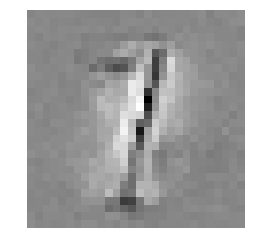

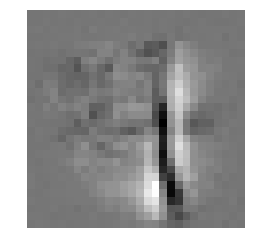

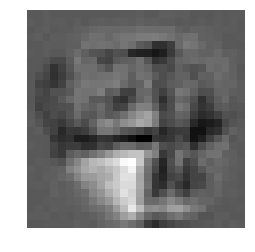

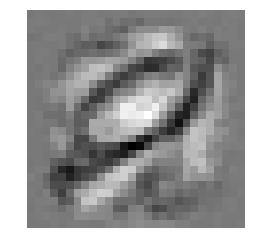

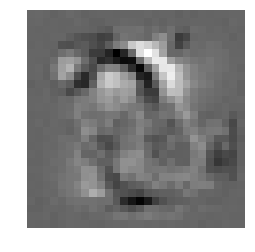

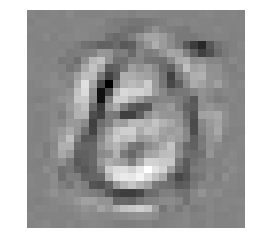

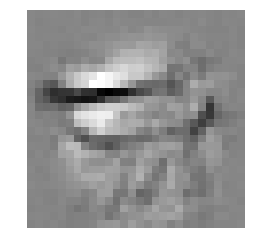

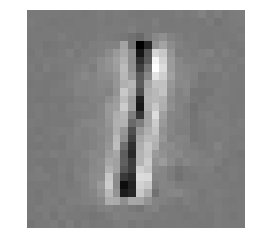

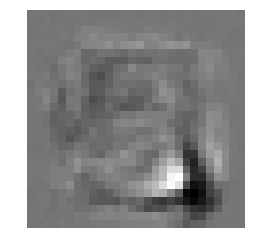

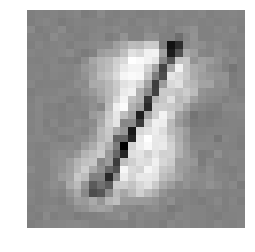

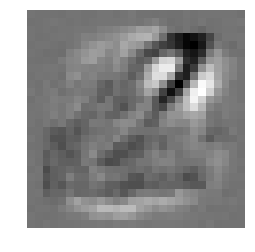

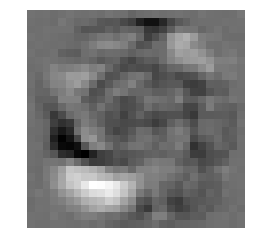

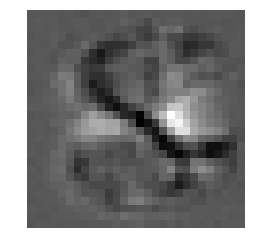

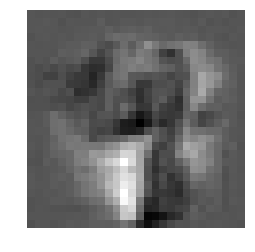

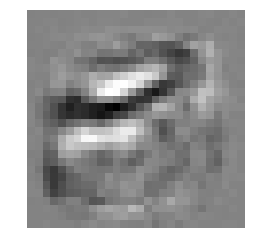

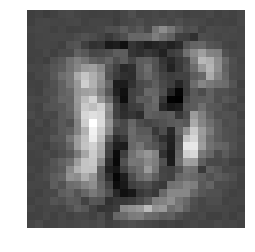

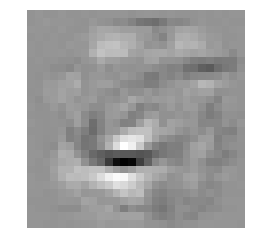

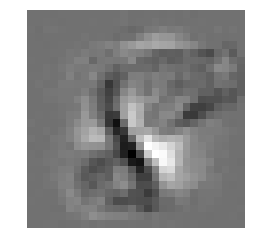

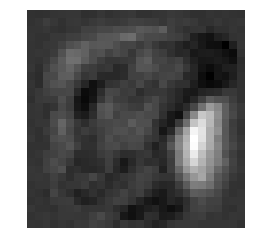

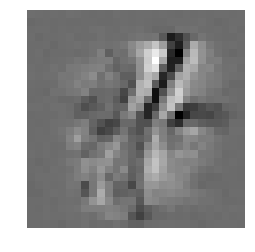

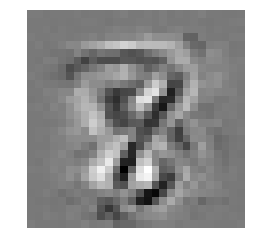

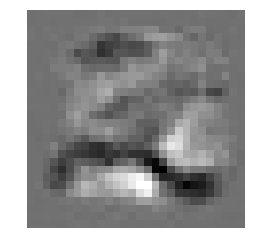

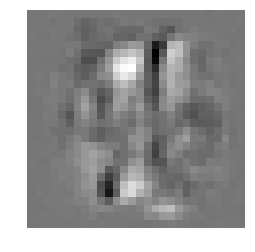

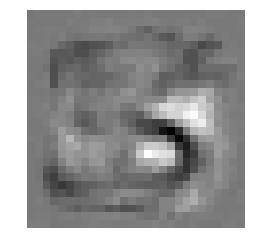

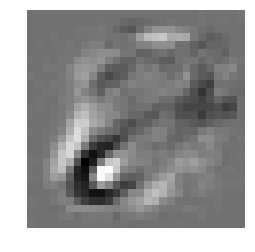

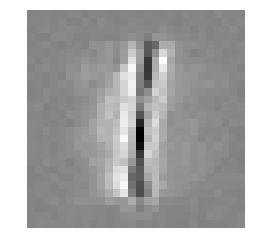

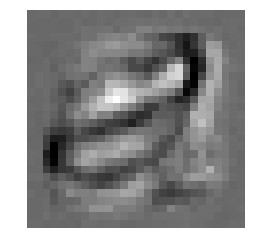

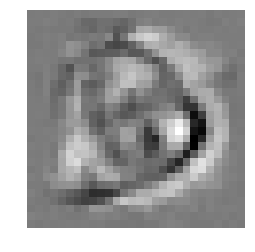

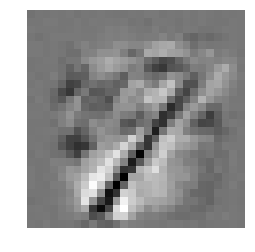

In [12]:
for i in range(49):
    c = W[i, :].reshape(28,28)
    plt.imshow(c, cmap = matplotlib.cm.binary,interpolation="nearest")
    plt.axis("off")
    plt.show()